In [1]:
"/home/mingyu/data/public/A2744/MZR/A2744_Extractions/jw01324001001_new_00023.1D.fits"

'/home/mingyu/data/public/A2744/MZR/A2744_Extractions/jw01324001001_new_00023.1D.fits'

In [1]:
from astromy.line import search_line

search_line(12000, element_spectrum='O')

/data/home/mingyu/opt/miniconda3/lib/python3.9/site-packages/astroquery/atomic/core.py:309: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 309 of the file /data/home/mingyu/opt/miniconda3/lib/python3.9/site-packages/astroquery/atomic/core.py. To get rid of this warning, pass the additional argument 'features="html5lib"' to the BeautifulSoup constructor.

  bs = BeautifulSoup(response.text, 'html5')
/data/home/mingyu/opt/miniconda3/lib/python3.9/site-packages/astroquery/atomic/core.py:249: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system

LAMBDA VAC ANG,SPECTRUM,TT,CONFIGURATION,TERM,J J,A_ki,LEVEL ENERGY CM 1
float64,str5,str2,str31,str6,str7,float64,str23
11990.9,O II,E1,2s2.2p2.(1D).4p-2s2.2p2.(1D).4d,2Fo-2D,7/2-5/2,2760000.0,266588.33 - 274928.00
11995.8,O II,E1,2s2.2p2.(1D).4p-2s2.2p2.(1D).4d,2Fo-2D,5/2-3/2,2900000.0,266579.73 - 274916.00
11997.0,O III,E1,2s.2p2.(2D).3s-2s2.2p.(2Po).5d,3D-3Do,3-3,5390000.0,394197.90 - 402533.30
12001.8,O III,E1,2s.2p2.(2D).3s-2s2.2p.(2Po).5d,3D-3Do,1-2,908000.0,394079.40 - 402411.50


In [74]:
from astroquery.nist import Nist
import astropy.units as u
table = Nist.query(5000 * u.AA, 5100 * u.AA, linename="O III")
table

Observed,Ritz,Transition,Rel.,Aki,fik,Acc.,Ei Ek,Lower level,Upper level,Type,TP,Line
int64,float64,float64,int64,float64,float64,str2,str25,str26,str25,str2,str17,int64
--,5008.24,19967.1,--,0.0181,--,B,0.0379607 - 2.513565,2s2.2p2 | 3P | 2,2s2.2p2 | 1D | 2,M1,"T4010,T4899,T4026",--
--,5008.24,19967.1,--,3.52e-05,--,C+,0.0379607 - 2.513565,2s2.2p2 | 3P | 2,2s2.2p2 | 1D | 2,E2,T4899,--
--,5051.278,19796.97,--,8400000.0,0.0107,C+,47.203006 - 49.657518,2s2.2p.(2P*).4d | 3P* | 1,2s.2p2.(4P).3d | 3P | 0,--,T5376LS,--
--,5062.143,19754.48,--,3480000.0,0.00802,C+,47.201591 - 49.650835,2s2.2p.(2P*).4d | 3P* | 2,2s.2p2.(4P).3d | 3P | 1,--,T5376LS,--
--,5065.068,19743.07,--,2080000.0,0.008,C+,47.203006 - 49.650835,2s2.2p.(2P*).4d | 3P* | 1,2s.2p2.(4P).3d | 3P | 1,--,T5376LS,--
--,5069.968,19723.99,--,2770000.0,0.032,C+,47.205372 - 49.650835,2s2.2p.(2P*).4d | 3P* | 0,2s.2p2.(4P).3d | 3P | 1,--,T5376LS,--
--,5090.341,19645.05,--,6150000.0,0.0239,C+,47.201591 - 49.637267,2s2.2p.(2P*).4d | 3P* | 2,2s.2p2.(4P).3d | 3P | 2,--,T5376LS,--
--,5093.299,19633.64,--,2050000.0,0.0133,C+,47.203006 - 49.637267,2s2.2p.(2P*).4d | 3P* | 1,2s.2p2.(4P).3d | 3P | 2,--,T5376LS,--


In [54]:
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
class Grizli1D:
    def __init__(self, path):
        with fits.open(path) as hdul:
            self.primary_header = hdul[0].header
            self.id = self.primary_header['ID']
            self.ra = self.primary_header['RA']
            self.dec = self.primary_header['DEC']
            self.target = self.primary_header['TARGET']
            self.data = {}
            for ext_id in range(1, len(hdul)):
                self.data[hdul[ext_id].name] = Table.read(hdul[ext_id])
            self.band = self.data.keys()
            
    def concat_band(self):
        data = [self.data[band] for band in self.band]
        
        data = vstack(data)
        print(data)
        # data = data.sort('wave')
        # return data


In [55]:
t = Grizli1D("/home/mingyu/data/public/A2744/MZR/A2744_Extractions/jw01324001001_new_00023.1D.fits")
t.concat_band()

       wave         flux   err   npix          flat         contam  line   cont 
     Angstrom      ct / s ct / s      Angstrom cm2 ct / erg ct / s ct / s ct / s
------------------ ------ ------ ---- --------------------- ------ ------ ------
 9719.063075947557    0.0    0.0    0                   0.0    0.0    0.0    0.0
 9757.264148132257    0.0    0.0    0                   0.0    0.0    0.0    0.0
 9795.615355342281    0.0    0.0    0                   0.0    0.0    0.0    0.0
 9834.117287627188    0.0    0.0    0                   0.0    0.0    0.0    0.0
  9872.77053735551    0.0    0.0    0                   0.0    0.0    0.0    0.0
 9911.575699223857    0.0    0.0    0                   0.0    0.0    0.0    0.0
 9950.533370266072    0.0    0.0    0                   0.0    0.0    0.0    0.0
 9989.644149862419    0.0    0.0    0                   0.0    0.0    0.0    0.0
  10028.9086397488    0.0    0.0    0                   0.0    0.0    0.0    0.0
10068.327444026017    0.0   

/tmp/ipykernel_3715736/3053281229.py:34: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t.data['F115W']['wave'], t.data['F115W']['flux']/t.data['F115W']['flat'])
/tmp/ipykernel_3715736/3053281229.py:35: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t.data['F115W']['wave'], t.data['F115W']['err']/t.data['F115W']['flat'])
/tmp/ipykernel_3715736/3053281229.py:37: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t.data['F150W']['wave'], t.data['F150W']['flux']/t.data['F150W']['flat'])
/tmp/ipykernel_3715736/3053281229.py:38: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t.data['F200W']['wave'], t.data['F200W']['flux']/t.data['F200W']['flat'])


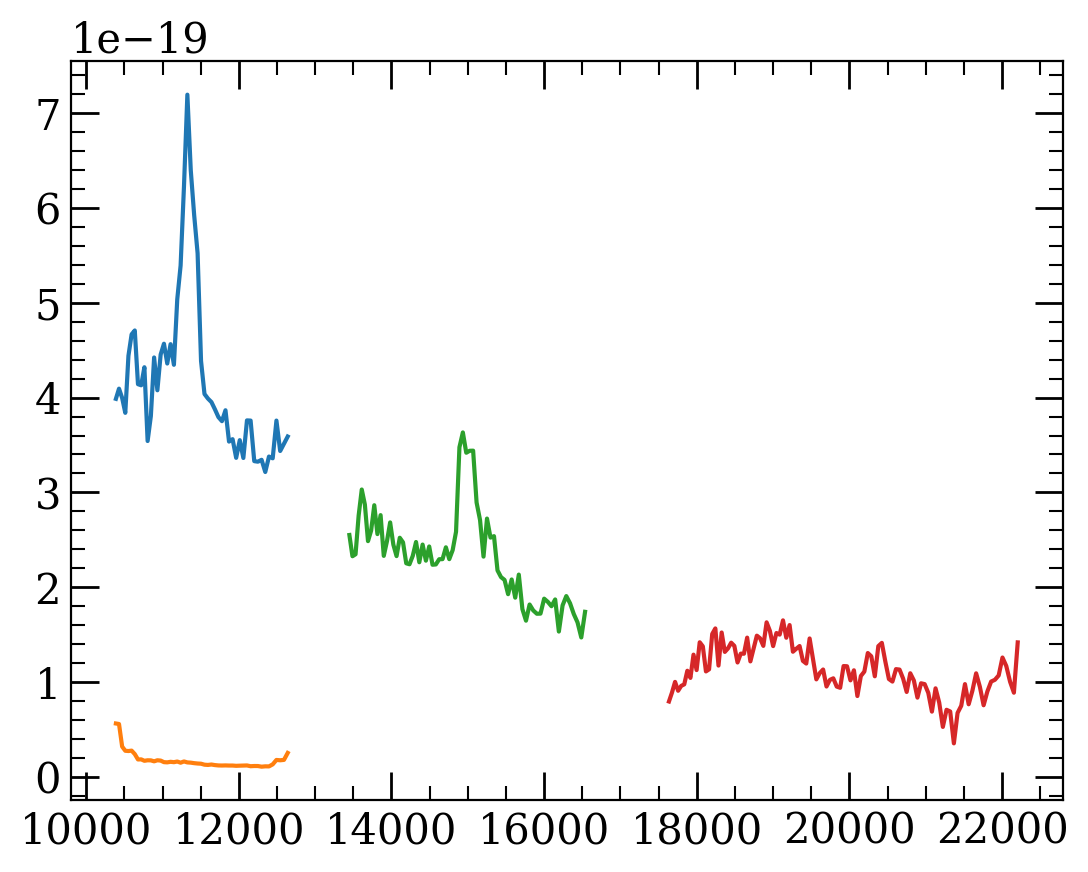

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size']=15
plt.rcParams['xtick.direction'] = 'in'  
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['xtick.color']='k'
plt.rcParams['ytick.color']='k'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 0.75
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 0.75
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["font.size"] = 15


plt.plot(t.data['F115W']['wave'], t.data['F115W']['flux']/t.data['F115W']['flat'])
plt.plot(t.data['F115W']['wave'], t.data['F115W']['err']/t.data['F115W']['flat'])

plt.plot(t.data['F150W']['wave'], t.data['F150W']['flux']/t.data['F150W']['flat'])
plt.plot(t.data['F200W']['wave'], t.data['F200W']['flux']/t.data['F200W']['flat'])

In [51]:
t.data

{'F115W': <Table length=79>
        wave          flux    err    npix ...  contam   line    cont 
      Angstrom       ct / s  ct / s       ...  ct / s  ct / s  ct / s
      float64       float64 float64 int64 ... float64 float64 float64
 ------------------ ------- ------- ----- ... ------- ------- -------
  9719.063075947557     0.0     0.0     0 ...     0.0     0.0     0.0
  9757.264148132257     0.0     0.0     0 ...     0.0     0.0     0.0
  9795.615355342281     0.0     0.0     0 ...     0.0     0.0     0.0
  9834.117287627188     0.0     0.0     0 ...     0.0     0.0     0.0
   9872.77053735551     0.0     0.0     0 ...     0.0     0.0     0.0
  9911.575699223857     0.0     0.0     0 ...     0.0     0.0     0.0
  9950.533370266072     0.0     0.0     0 ...     0.0     0.0     0.0
  9989.644149862419     0.0     0.0     0 ...     0.0     0.0     0.0
   10028.9086397488     0.0     0.0     0 ...     0.0     0.0     0.0
                ...     ...     ...   ... ...     ...     ... 

In [48]:
hdul = fits.open( "/home/mingyu/data/public/A2744/MZR/A2744_Extractions/jw01324001001_new_00023.1D.fits" )

hdul[1].data

FITS_rec([( 9719.06307595, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          ( 9757.26414813, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          ( 9795.61535534, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          ( 9834.11728763, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          ( 9872.77053736, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          ( 9911.57569922, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          ( 9950.53337027, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          ( 9989.64414986, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          (10028.90863975, 0.        , 0.        ,   0, 0.00000000e+00, 0.        , 0.        , 0.        ),
          (10068.32

In [26]:
hdul['F115W'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   64 / length of dimension 1                          
NAXIS2  =                   79 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'wave    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'flux    '                                                            
TFORM2  = 'D       '        

In [15]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ID      =                   23 / Object ID                                      
RA      =    3.586246227653969 / Right Ascension                                
DEC     =   -30.41654677671226 / Declination                                    
TARGET  = 'jw01324001001_new'  / Target Name                                    
MW_EBV  =                  0.0 / Galactic extinction E(B-V)                     
N_G102  =                    0 / Number of exposures                            
T_G102  =                    0 / Total exposure time                            
PA_G102 =                    0 / Number of PAs                                  
N_G141  =                   